<a href="https://colab.research.google.com/github/kd0176/Covid-19-Tweet-Sentiment-Analysis/blob/main/Covid_19_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :**   **Covid-19 Tweet Sentiment Analysis**


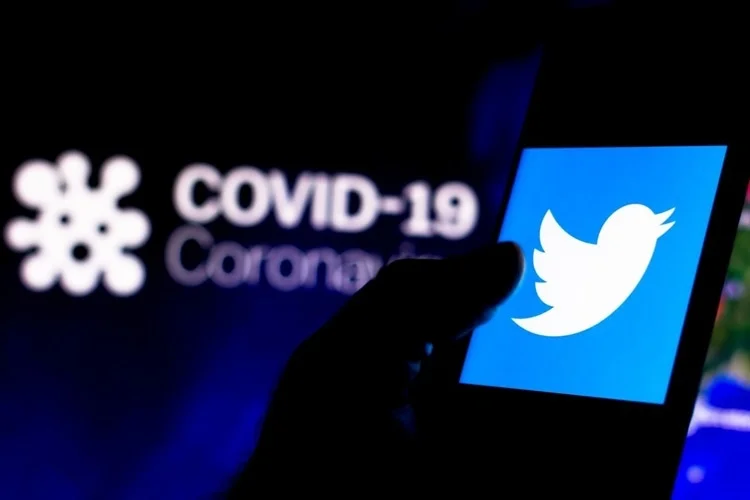

##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

####This Project is for sentiment analysis of Tweets related to the Covid-19 pandemic, which is a multi-label classification task. Since the outbreak of coronavirus, it has affected more than 180 countries where massive losses in the economy and jobs globally and confining about 58% of the global population are caused. The research on people’s feelings is essential for keeping mental health and informed about Covid-19.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


#### This challenge asks you to build a classification ML model to predict the sentiment of covid-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then. the names and usernames have been given codes to avoid any privacy concerns.

## Dataset Description
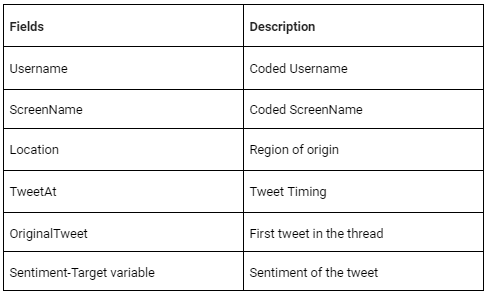

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np                                   # numerical computations
import pandas as pd                                  # data analyze

import seaborn as sns                                # data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                      # Ignore warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
url='https://drive.google.com/file/d/1Z_35uIfRSiDleNUslnr9W9ImFMRNg-tm/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='latin-1')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
# Missing Values/Null Values percentage
df.isnull().sum()/df.shape[0]*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

Text(0.5, 1.0, 'Visualizing the missing values')

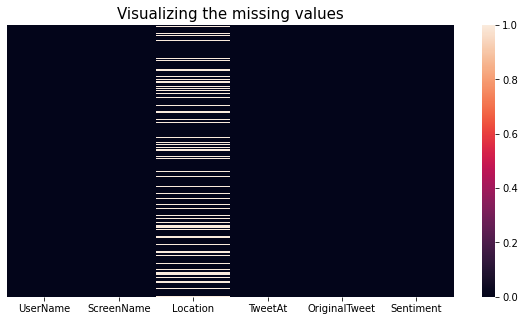

In [10]:
# Visualizing the missing values using Heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar=True, annot=False, yticklabels=False)
plt.title('Visualizing the missing values', fontsize = 15)

### What did you know about your dataset?

* There are 41157 rows and 6 columns in this dataset.
* Dataset has no duplicated rows.
* Location column contains approx 21% of null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include = 'all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description 

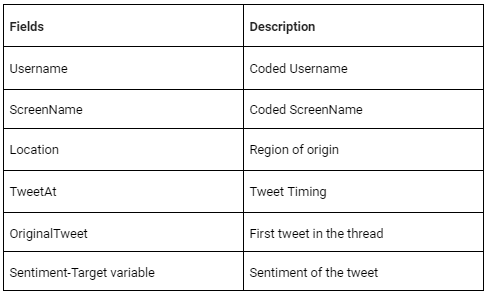

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns:
  print("unique value count in",i,"is",df[i].nunique())

unique value count in UserName is 41157
unique value count in ScreenName is 41157
unique value count in Location is 12220
unique value count in TweetAt is 30
unique value count in OriginalTweet is 41157
unique value count in Sentiment is 5


In [14]:
# Check Unique Values for 'TweetAt'
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [15]:
# Check Unique Values for 'Sentiment'
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

----observation----
* By checking unique value for TweetAt column which is tweet date we found out that dataset has 30 days of data. 

* Target variable ('Sentiment') has 5 different classes. 

## 3. ***Data Wrangling***

### Write your code to make your dataset analysis ready.

In [16]:
# Drop 'UserName' and 'screenName' column
df.drop(['UserName', 'ScreenName'], axis = 1, inplace = True) 

In [17]:
# Create new column 'tweet_length'
df['tweet_length'] = df['OriginalTweet'].str.len()

In [18]:
cities_df = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')
cities_df.head()

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696


In [19]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,tweet_length
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


### What all manipulations have you done and insights you found?

Answer Here.

* The 'UserName' and 'ScreenName' columns are not giving any meaningful insights for our analysis, so we droped these two columns.

* Created a new columns 'tweet_length' for EDA by calculating total number of characters present in each tweet.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Pie chart for visualizing sentiment proportion.

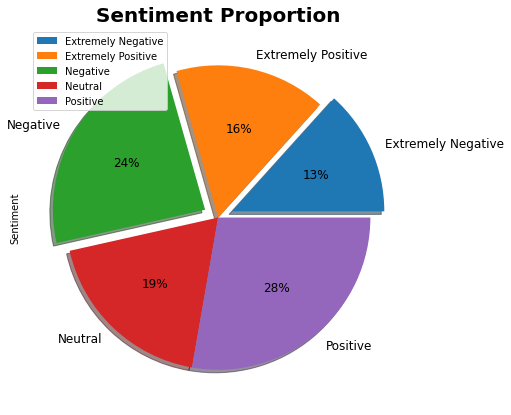

In [20]:
# Plotting pie chart for visualizing sentiment proportion.
plt.figure(figsize = (10,7))
df.groupby('Sentiment')['Sentiment'].count().plot(kind='pie', autopct='%1.0f%%',shadow = True, explode = [0.1,0,0.1,0,0], fontsize = 12)
plt.title('Sentiment Proportion', fontsize = 20, weight='bold')
plt.legend(loc = 'best')
plt.show()

##### 1. Why did you pick the specific chart?

`Answer Here.`

Pie charts are commonly used in data visualization to display proportions or percentages of a whole. They can be useful for presenting data in a clear and concise way, particularly when you want to show the relative sizes of different categories.

Some of the benefits of using pie charts include:
* Easy to understand
* Good for displaying proportions
* Useful for comparisons
* Attractive
* Can highlight trends

##### 2. What is/are the insight(s) found from the chart?

`----insights----`

* There are five types of sentiments - Positive, Extremly Positive, Negative, Extremly Negative, Neutral.

* Number of total Positive tweets are more than total Negative tweets.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [59]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim()
def geocode(city, recursion=0):
    try:
        return geolocator.geocode(city, timeout=None)
    except GeocoderTimedOut as e:
        if recursion > 10:      # max recursions
            raise e

        # time.sleep(1) # wait a bit
        # try again
        return geocode(city, recursion=recursion + 1)

In [167]:
top_locs = df['Location'].value_counts()
top_loc_df = top_locs[:50].reset_index()
top_loc_df.rename(columns = {'index' : 'location', "Location" : 'count'}, inplace = True)

top_negatives = df['Location'][df['Sentiment'].isin(['Negative', 'Extremely Negative'])].value_counts()
top_neg_df = top_negatives[:50].reset_index()
top_neg_df.rename(columns = {'index' : 'location', "Location" : 'neg_count'}, inplace = True)

top_loc_list = top_loc_df['location'].tolist()  + top_neg_df['location'].tolist()
top_loc_set = set(top_loc_list)
top_loc_list = list(top_loc_set)

lat_dict = {}
long_dict = {}
for i in top_loc_list:
  lat_long = geocode(i)[1]
  lat_dict[i] = lat_long[0]
  long_dict[i] = lat_long[1]

top_loc_df['latitude'] = top_loc_df['location'].map(lat_dict)
top_loc_df['longitude'] = top_loc_df['location'].map(long_dict) 

top_neg_df['latitude'] = top_neg_df['location'].map(lat_dict)
top_neg_df['longitude'] = top_neg_df['location'].map(long_dict)


In [173]:
top_neg_df

,location,neg_count,latitude,longitude
0,London,208,51.507336,-0.127650
1,"London, England",195,51.507336,-0.127650
2,United States,171,39.783730,-100.445882
3,"Washington, DC",135,38.895037,-77.036543
4,United Kingdom,133,54.702354,-3.276575
5,"New York, NY",129,40.712728,-74.006015
6,India,100,22.351115,78.667743
7,Australia,88,-24.776109,134.755000
8,"Los Angeles, CA",88,34.053691,-118.242766
9,UK,87,54.702354,-3.276575


In [175]:
top_neg_df.groupby(['latitude', 'longitude'])['neg_count'].sum()

latitude    longitude  
-41.500083   172.834408     27
-37.814218   144.963161     28
-33.869844   151.208285     28
-28.816624   24.991639      24
-26.205000   28.049722      24
-24.776109   134.755000     88
 0.317714    32.581354      25
 1.357107    103.819499     34
 6.455057    3.394179       30
 9.600036    7.999972       35
 19.078545   72.878176      77
 22.351115   78.667743     100
 27.756767  -81.463983      30
 28.613895   77.209006      40
 29.758938  -95.367697      36
 30.271129  -97.743700      33
 31.263890  -98.545612      42
 32.717420  -117.162773     26
 33.748992  -84.390264      42
 34.053691  -118.242766    118
 34.233137  -102.410749     28
 36.701463  -118.755997     56
 37.779026  -122.419906     43
 38.895037  -77.036543     135
 38.907432  -77.035092      37
 39.783730  -100.445882    253
 39.952724  -75.163526      30
 40.075738  -74.404162      26
 40.712728  -74.006015     239
 41.875562  -87.624421      50
 42.355433  -71.060511      43
 43.653482  -79

In [176]:
import plotly.express as px
fig = px.scatter_mapbox(top_neg_df, lat='latitude', lon='longitude',
                        mapbox_style="open-street-map", color_discrete_sequence=["fuchsia"], zoom=1, height=600, width=1000)
 
fig.show()

In [181]:
# !pip install plotly==5.8.0
import plotly.express as px
fig = px.density_mapbox(top_loc_df, lat='latitude', lon='longitude', z='count',
                        mapbox_style="stamen-terrain",  zoom=1, height=600, width=1000, radius=20, opacity = 1)
 
fig.show()

In [128]:
top_neg_df

,location,neg_count,latitude,longitude
0,London,208,51.507336,-0.127650
1,"London, England",195,39.783730,-100.445882
2,United States,171,51.507336,-0.127650
3,"Washington, DC",135,40.712728,-74.006015
4,United Kingdom,133,38.895037,-77.036543
5,"New York, NY",129,54.702354,-3.276575
6,India,100,34.053691,-118.242766
7,Australia,88,22.351115,78.667743
8,"Los Angeles, CA",88,54.702354,-3.276575
9,UK,87,-24.776109,134.755000


In [129]:
top_loc_df

,location,count,latitude,longitude
0,London,540,51.507336,-0.127650
1,United States,528,39.783730,-100.445882
2,"London, England",520,51.507336,-0.127650
3,"New York, NY",395,40.712728,-74.006015
4,"Washington, DC",373,38.895037,-77.036543
5,United Kingdom,337,54.702354,-3.276575
6,"Los Angeles, CA",281,34.053691,-118.242766
7,India,268,22.351115,78.667743
8,UK,232,54.702354,-3.276575
9,Australia,225,-24.776109,134.755000


In [93]:
lat_dict = {}
long_dict = {}
for i in top_locs:
  lat_long = geocode(i)[1]
  lat_dict[i] = lat_long[0]
  long_dict[i] = lat_long[1]


In [94]:
df['latitude'] = df['Location'].map(lat_dict)
df['longitude'] = df['Location'].map(long_dict)

In [95]:
df[~df['latitude'].isnull()]

,Location,TweetAt,OriginalTweet,Sentiment,tweet_length,latitude,longitude
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,51.507336,-0.127650
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,54.702354,-3.276575
13,"Chicago, IL",16-03-2020,"Me: I don't need to stock up on food, I'll jus...",Positive,133,41.875562,-87.624421
17,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral,209,50.000678,-86.000977
19,"Denver, CO",16-03-2020,"For those who aren't struggling, please consid...",Positive,184,39.739236,-104.984862
...,...,...,...,...,...,...,...
41135,"New York, NY",14-04-2020,"As physical stores close, clothing retailers a...",Positive,149,40.712728,-74.006015
41138,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive,181,34.053691,-118.242766
41141,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral,218,22.351115,78.667743
41147,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,82,40.652601,-73.949721


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [20]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [21]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [22]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [23]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [24]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [25]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [26]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [27]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [28]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [29]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [30]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [31]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [32]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [38]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [39]:
# Expand Contraction

#### 2. Lower Casing

In [40]:
# Lower Casing

#### 3. Removing Punctuations

In [41]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [42]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [43]:
# Remove Stopwords

In [44]:
# Remove White spaces

#### 6. Rephrase Text

In [45]:
# Rephrase Text

#### 7. Tokenization

In [46]:
# Tokenization

#### 8. Text Normalization

In [47]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [48]:
# POS Taging

#### 10. Text Vectorization

In [49]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [50]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [51]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [52]:
# Transform Your data

### 6. Data Scaling

In [53]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [54]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [55]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [56]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [57]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [62]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [65]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [66]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***